<a href="https://colab.research.google.com/github/vishal958/ML-Datascience-Notebooks/blob/master/EDA/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting for Exploratory data analysis (EDA)

#  Basic Terminology

#Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

**Objective**

---


**To predict whether a patient will survive after 5 years or not based upon the patient's age,his/her operation_year and the number of nodes.** **bold text**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
haberman = pd.read_csv('drive/My Drive/Colab Notebooks/ExploratoryDataAnalysisAssignment/haberman.csv')
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


**Number of Points**

In [ ]:
haberman.shape

(306, 4)

**Here in this dataset there are 4 different attributes and has total of 306 patients.**

In [ ]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


**These are the names of the attributes. status is target attribute if the status=1, then  patients has survived more than 5 years after undergone surgery if its 2 then patient died with 5 years after the surgery.**

In [ ]:
print(haberman['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


**Here, out of 306 patients, 225 patients survived more than 5 years and 81 patients died within 5 years after surgery.**

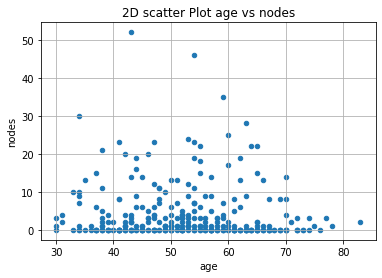

In [ ]:
haberman.plot(kind='scatter', x='age', y= 'nodes')
plt.grid()
plt.title('2D scatter Plot age vs nodes')
plt.show()

**This is scatter plot of patients with age as x-axis and number of nodes at y-axis**

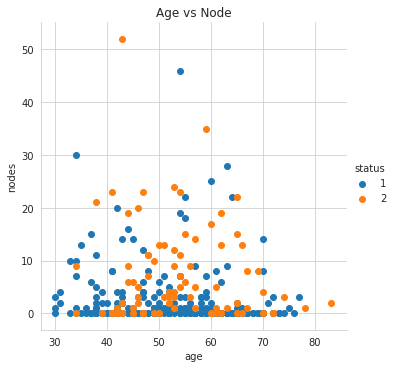

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('Age vs Node')
plt.show();

**Blue dots represent the patients survived more than 5 years and orange represent patients died within 5**

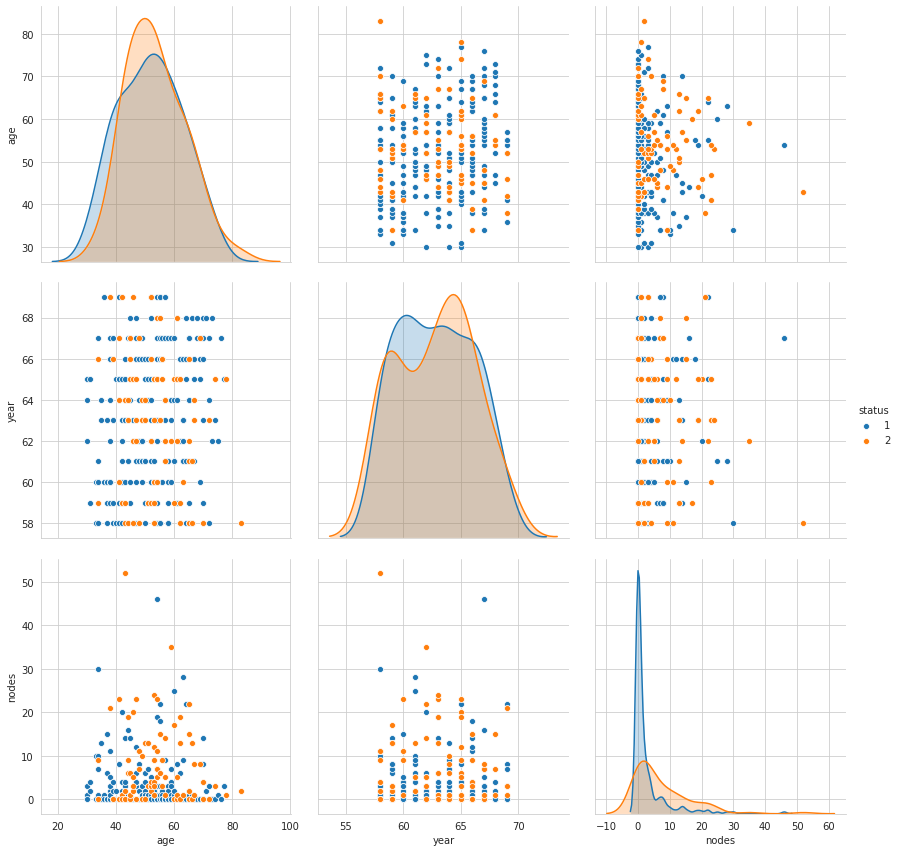

In [ ]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='status',height=4,vars=['age','year', 'nodes'])
plt.show()

**Plot no 3 (age vs nodes) has less number of overlapping points as compared to other plots. So (age,nodes) attributes can be used for better classification.**

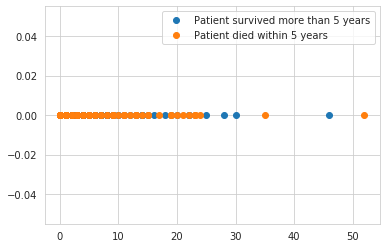

In [ ]:
#1D scatter Plot
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];
plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o')
plt.plot(haberman_2["nodes"], np.zeros_like(haberman_2['nodes']), 'o')
plt.legend(['Patient survived more than 5 years','Patient died within 5 years'])


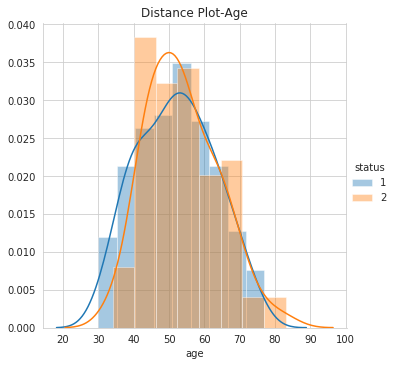

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Distance Plot-Age')
plt.show();



**Distance Plot for age, as I can see that with the help of age I cannot say that this is the best feature to classify survival and death of patients. As both are almost similar.**

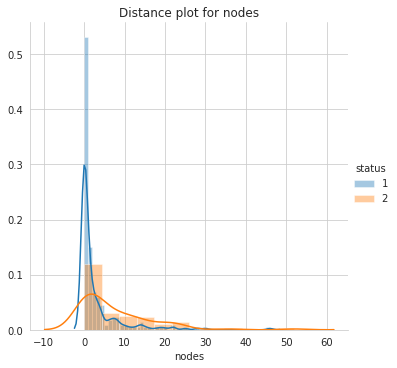

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Distance plot for nodes')
plt.show();



**With this plot i can say that less the number of nodes, more is the survival. So number of nodes is the best feature which can be used for classification.**

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


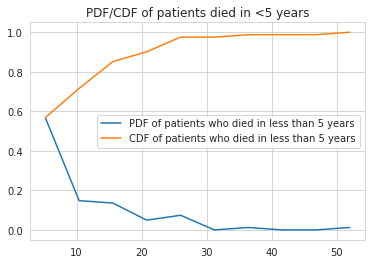

In [ ]:
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('PDF/CDF of patients died in <5 years')
plt.legend(['PDF of patients who died in less than 5 years', 'CDF of patients who died in less than 5 years'])


**55% of the patients have nodes approx(5). It means there is 55% chances of short survival if the nodes are less than 5**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


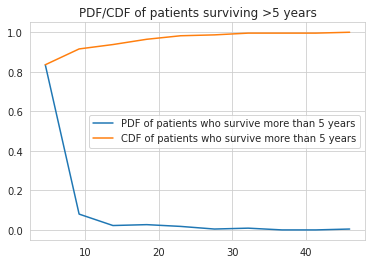

In [ ]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('PDF/CDF of patients surviving >5 years')
plt.legend(['PDF of patients who survive more than 5 years', 'CDF of patients who survive more than 5 years'])

**It means there is 85% chances of long survival if the nodes are less than 7.**

85%  of the patients have nodes <7

In [ ]:
#Mean,Std-deviation,  
print("Means:")
print(np.mean(haberman_1["nodes"]))

print(np.mean(haberman_2["nodes"]))


print("\nStd-dev:");
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))






Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


In [ ]:
print("\nMedians:")
print(np.median(haberman_1["nodes"]))
print(np.median(haberman_2["nodes"]))



print("\nQuantiles:")
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


**From the above results:**

---


**(>5 years survival)-> from the quantiles we can say that 25% of the people have nodes more than 3 and 75% of the patients have 0 nodes.**

---


**(<5 years survival ) -> from the quantiles we can say that 25% of the patients have nodes more than 11, 50 % of patients have nodes more than 4.**


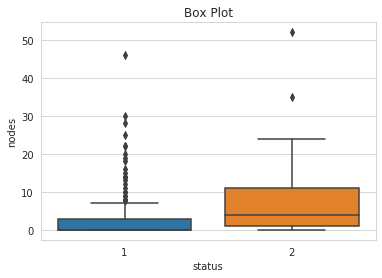

In [ ]:
ax = sns.boxplot(x='status',y='nodes', data=haberman)
plt.title('Box Plot')
plt.show()

From the above results:
---

**1.   (For survival > 5) 25th and 50th percentile is almost same.Maximum threshold is 7.**

---


**2.   (For survival <5) Maximum threshod is 24-25 nodes approx.**

---


**3.   50% of short survival overlap with the long survial.**






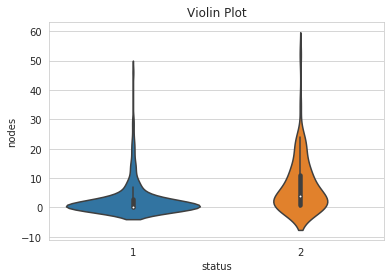

In [ ]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title('Violin Plot')
plt.show()

# **Conclusion**

---

1. There are 4 different attributes and has total of 306 patients.
2. status is target attribute if the status=1, then patients has survived more than 5 years after undergone surgery if it is 2 then patient died with 5 years after the surgery.
3. Out of 306 patients, 225 patients survived more than 5 years and 81 patients died within 5 years after surgery.
4. By Pair plot results, i found that (age vs nodes) plot has lesser number of overlapping points as compared to other plots. So (age,nodes) attributes can be used for better classification.
5.By PDF results, it is found that age is not the good attribute to classify the patients into two classes. As PDF for both the classes were overlapping
6. By PDF results, it is found that more the number of nodes less is the survival chances of patient. So number of nodes can be considered as best attribute for classification
7. By CDF results for short survival patients, 55% of the patients have nodes approx(5). It means there is 55% chances of short survival if the nodes are less than 5.
8. By CDF results for long survival patients, there is 85% chances of long survival if the nodes are less than 7.
9. From the Quantile results for long survival patients, we can say that 25% of the people have nodes more than 3 and 75% of the patients have 0 nodes.
10. From the quantile result for short survival patients, we can say that 25% of the patients have nodes more than 11, 50 % of patients have nodes more than 4.  
11.Box Plot Results:(For survival > 5) 25th and 50th percentile is almost same.Maximum threshold is 7.
12. (For survival <5) Maximum threshod is 24-25 nodes approx.
13. 50% of short survival overlap with the long survial.